# チームスタイルを指標としたクラスター分析
チームごとに異なるプレースタイルを可視化、分類するための手法の実装<br>
今回は以下のデータを用いた。<br>
#### 要素
* チーム名
#### 変数
* 攻撃 
* セットプレー
* 左サイド攻撃
* 中央攻撃
* 右サイド攻撃
* ショートカウンター
* ロングカウンター
* 敵陣ポゼッション
* 自陣ポゼッション

[FootballLAB](https://www.football-lab.jp/summary/team_style/j1/?year=2023)より<br>

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.manifold import MDS,TSNE
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [2]:
# 2023.10.29の試合までの試合をもとに、チームごとに戦術の傾向を数値化したデータを利用
# df_teamstyle = pd.read_csv('../../api_data/team_style_2023.csv')
df_teamstyle = pd.read_csv('../../scraping/team_style_2023.csv')
df_teamstyle.head(6)

,team.name,atk.set.play,left.side.attack,center.attack,right.side.attack,short.counter,long.counter,enemy.camp.possession,self.camp.possession
0,Vissel Kobe,58,57,44,59,59,51,45,46
1,Yokohama F･Marinos,42,47,61,43,43,41,61,61
2,Urawa Reds,46,36,46,55,41,42,54,61
3,Sanfrecce Hiroshima,83,70,63,66,76,65,49,40
4,Nagoya Grampus,50,41,39,42,48,64,42,45
5,Kashima Antlers,49,44,46,55,46,46,43,44


In [3]:
# 確認用（データフレームを2次元配列に変換した場合の一列目のデータ）
df_teamstyle.values[0,:]

array(['Vissel Kobe', 58, 57, 44, 59, 59, 51, 45, 46], dtype=object)

In [4]:
# 上記実行結果から0、1列目のデータを取り除いたものを検証する
X = df_teamstyle.values[:,1:]
X

array([[58, 57, 44, 59, 59, 51, 45, 46],
       [42, 47, 61, 43, 43, 41, 61, 61],
       [46, 36, 46, 55, 41, 42, 54, 61],
       [83, 70, 63, 66, 76, 65, 49, 40],
       [50, 41, 39, 42, 48, 64, 42, 45],
       [49, 44, 46, 55, 46, 46, 43, 44],
       [48, 57, 42, 52, 45, 45, 49, 55],
       [43, 50, 45, 59, 54, 46, 45, 37],
       [40, 61, 56, 52, 45, 36, 75, 55],
       [39, 52, 54, 35, 32, 34, 66, 74],
       [50, 69, 41, 39, 48, 45, 44, 44],
       [45, 54, 34, 43, 48, 57, 50, 65],
       [52, 42, 69, 66, 68, 69, 50, 50],
       [55, 35, 50, 60, 52, 43, 37, 38],
       [39, 49, 70, 35, 47, 46, 63, 56],
       [49, 44, 54, 38, 49, 51, 42, 46],
       [61, 55, 45, 57, 59, 65, 38, 39],
       [51, 38, 42, 45, 40, 52, 47, 47]], dtype=object)

## 非階層的クラスタリング

### 多次元尺度更生法（MSD）の実装

In [5]:
# 今回用いるデータはスケールが１００で固定されているため、標準化しない
# n_componentsは次元削減後の次元を表す
mds = MDS(n_components = 3)
Y = mds.fit_transform(X)

c:\Users\haruc\miniconda3\envs\sk_py311\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


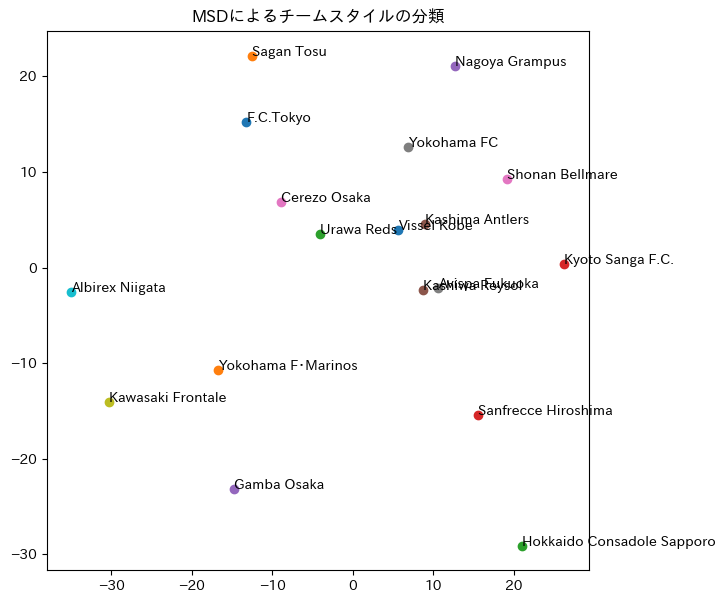

In [6]:
%matplotlib inline
# 表示に順位を表示したい場合
lab_standing = df_teamstyle.reset_index().values[:,0]+1
# 表示にチーム名を指定したい場合
labels = df_teamstyle.values[:,0]
plt.figure(figsize=(7,7))
for i in range(18):
    plt.scatter(Y[i,0],Y[i,1])
    plt.text(Y[i,0],Y[i,1],labels[i])
plt.title("MSDによるチームスタイルの分類")
plt.show()

### 主成分分析（PCA）の実装

In [7]:
pca = PCA(n_components = 3)
Y_p = pca.fit_transform(X)

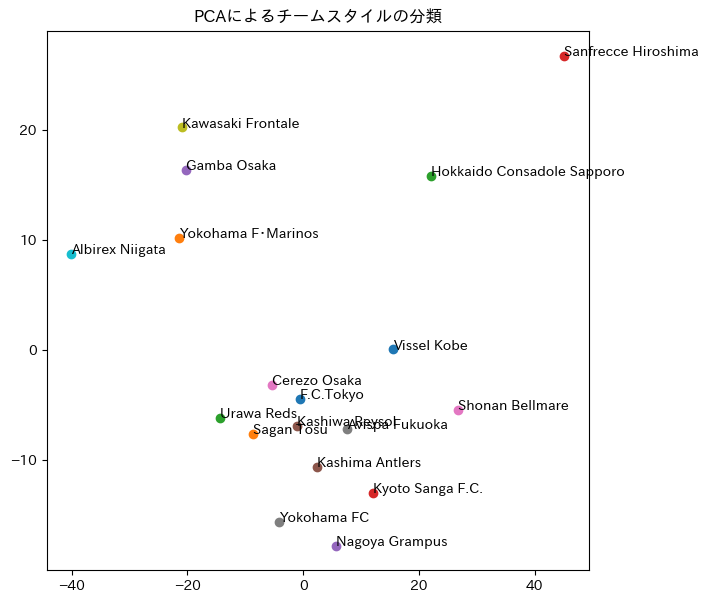

In [8]:
%matplotlib inline
plt.figure(figsize=(7,7))
for i in range(18):
    plt.scatter(Y_p[i,0],Y_p[i,1])
    plt.text(Y_p[i,0],Y_p[i,1],labels[i])
plt.title("PCAによるチームスタイルの分類")
plt.show()

### t-sne

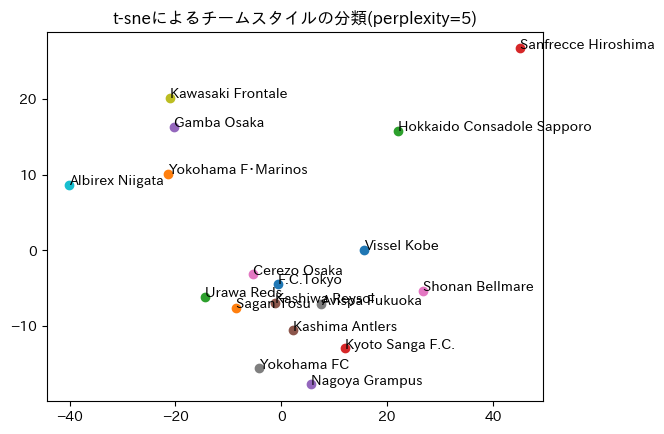

<Figure size 700x700 with 0 Axes>

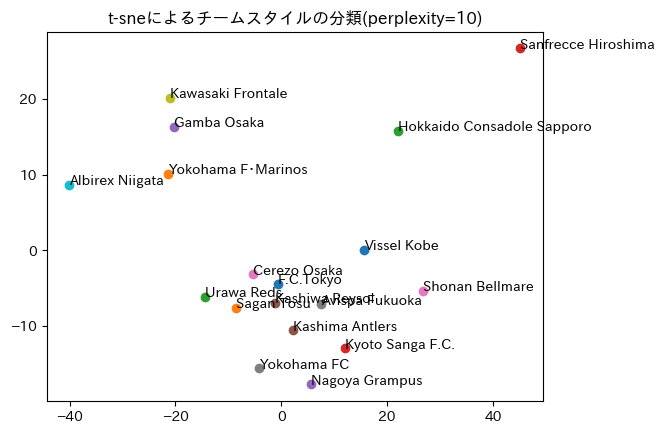

<Figure size 700x700 with 0 Axes>

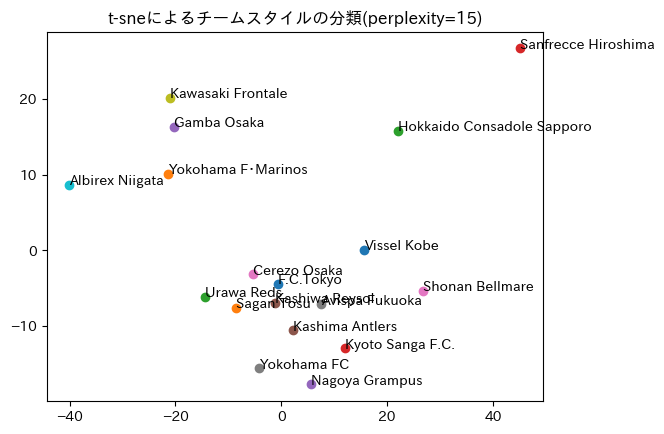

<Figure size 700x700 with 0 Axes>

In [9]:
for i in range(5,16,5):
    tsne = TSNE(n_components = 3, perplexity=i)
    Y_t = tsne.fit_transform(X)

    for j in range(18):
        plt.scatter(Y_p[j,0],Y_p[j,1])
        plt.text(Y_p[j,0],Y_p[j,1],labels[j])
    plt.title(f"t-sneによるチームスタイルの分類(perplexity={i})")
    plt.figure(figsize=(7,7))
    plt.show()


## 階層的クラスタリング

### ヴォード法

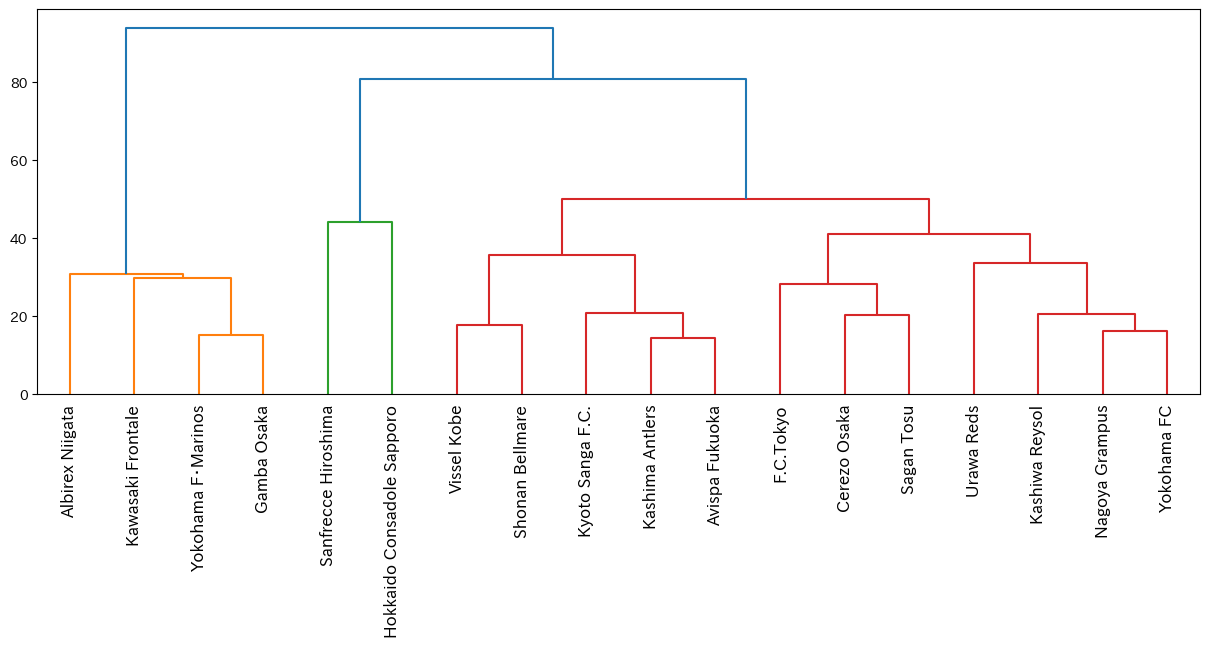

In [10]:
result = linkage(X, method='ward')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

### 最短距離法

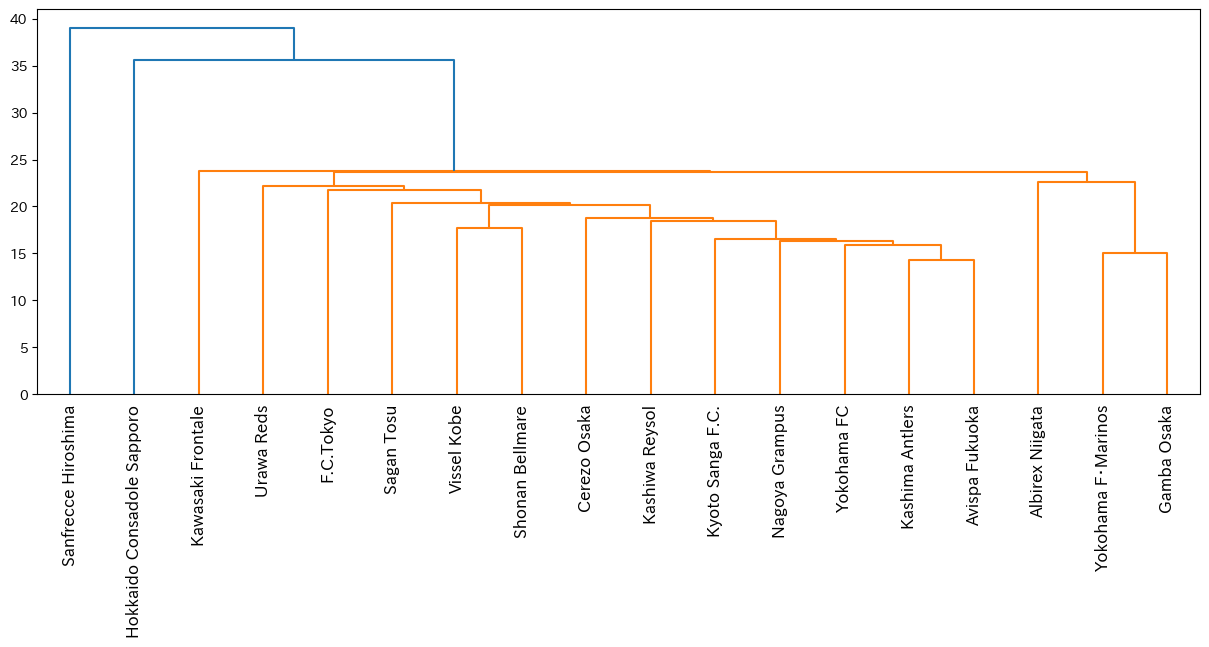

In [11]:
result = linkage(X, method='single')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

### 最長距離法

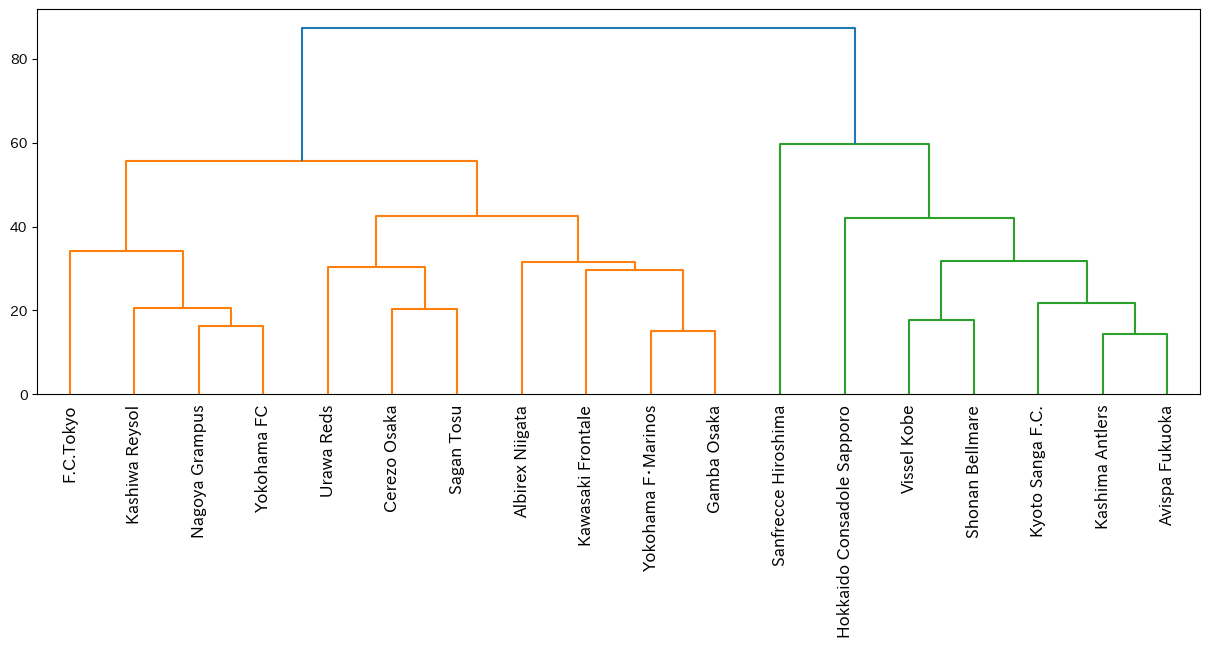

In [12]:
result = linkage(X, method='complete')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

### 重心法

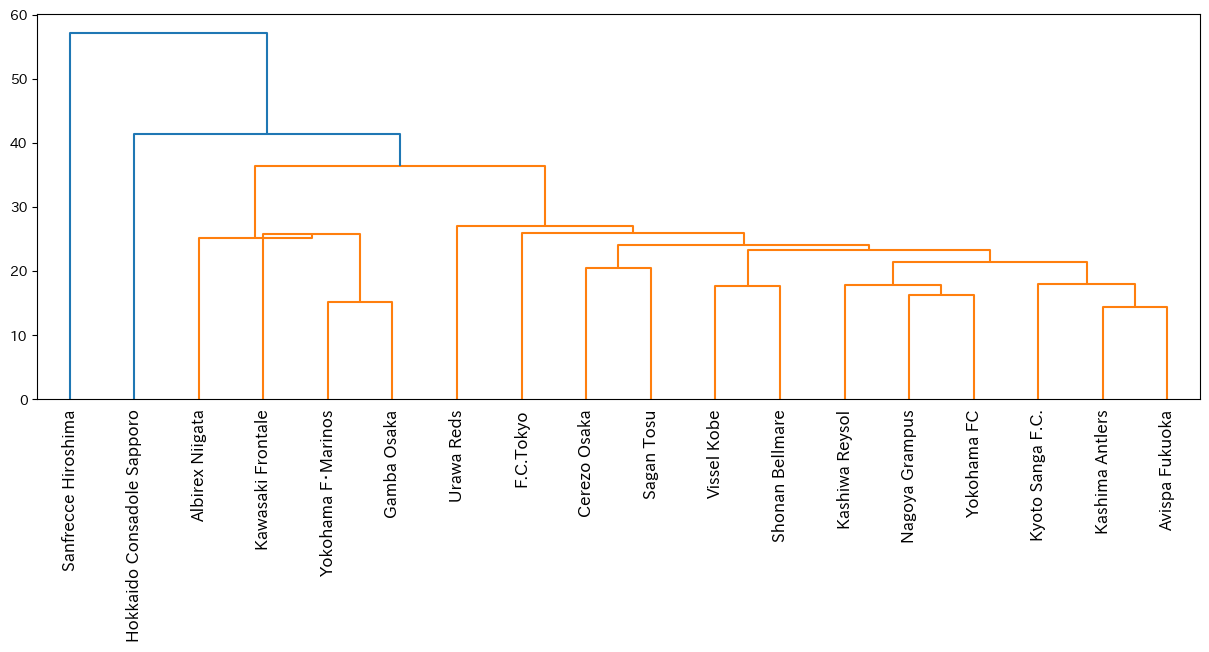

In [13]:
result = linkage(X, method='centroid')

plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

## 追実験
先程の変数に
* ホームでの得点率 * 100
* ホームでの失点率 * 100
* アウェイでの得点率 * 100
* アウェイでの失点率 * 100<br>
を付与してクラスタリングを行う。
実際の得点数としなかった理由は、既存の変数とスケールを合わせるためである。

<strong>
注意<br>
スクレイピングしたデータと、順位表のデータを掲載するサイトが異なるため、チーム名が異なる.<br>
順位をキーとして結合すれば順位（インデックスをもとに結合すれば結合できると考えたが、スクレイピングしたデータは順位を正確に表していなかった。。）<br>
そのため、分類する際はteam.nameのカラムを確認して、手作業でインデックスごと入れ替え・入れ替え後のインデックスをもとに結合する<br>

In [14]:
df_standing = pd.read_csv("../../api_data/standing/standing_2023.csv")
df_goals = \
    df_standing.apply(lambda row: [
        row["team.name"],
        row["home.goals.for"] / (row["home.goals.for"] + row["away.goals.for"]) *100,
        row["away.goals.for"] / (row["home.goals.for"] + row["away.goals.for"]) *100,
        row["home.goals.against"] / (row["home.goals.against"] + row["away.goals.against"]) *100,
        row["away.goals.against"] / (row["home.goals.against"] + row["away.goals.against"]) *100
    ], axis=1, result_type='expand')
df_goals = df_goals.rename(columns={0:"team.name",1:"home.goals.for.per",2:"away:goals.for.per",
                                    3:"home.goals.against.per",4:"away.goals.against.per"})
df_goals.head(3)

,team.name,home.goals.for.per,away:goals.for.per,home.goals.against.per,away.goals.against.per
0,Vissel Kobe,50.980392,49.019608,48.000000,52.000000
1,Yokohama F. Marinos,57.692308,42.307692,38.888889,61.111111
2,Urawa,57.142857,42.857143,45.454545,54.545455


---
---

In [15]:
df_reindex_teamstyle = df_teamstyle['team.name'].copy()
df_reindex_standing = df_standing['team.name'].copy()
df_reindex = pd.merge(df_reindex_teamstyle, df_reindex_standing, left_index=True, right_index=True,)


In [16]:
df_reindex

,team.name_x,team.name_y
0,Vissel Kobe,Vissel Kobe
1,Yokohama F･Marinos,Yokohama F. Marinos
2,Urawa Reds,Urawa
3,Sanfrecce Hiroshima,Kashima
4,Nagoya Grampus,Sanfrecce Hiroshima
5,Kashima Antlers,Nagoya Grampus
6,Cerezo Osaka,Cerezo Osaka
7,Avispa Fukuoka,Avispa Fukuoka
8,Kawasaki Frontale,Kawasaki Frontale
9,Albirex Niigata,FC Tokyo


In [32]:
# インデックスの調整を行う...
df_standing.iloc[[12, 13]] = df_standing.iloc[[13, 12]].values
# 可視化して確認しやすくするため
df_reindex['team.name_y'].iloc[[12, 13]] = df_reindex['team.name_y'].iloc[[13, 12]].values

In [33]:
df_reindex

,team.name_x,team.name_y
0,Vissel Kobe,Vissel Kobe
1,Yokohama F･Marinos,Yokohama F. Marinos
2,Urawa Reds,Urawa
3,Sanfrecce Hiroshima,Sanfrecce Hiroshima
4,Nagoya Grampus,Nagoya Grampus
5,Kashima Antlers,Kashima
6,Cerezo Osaka,Cerezo Osaka
7,Avispa Fukuoka,Avispa Fukuoka
8,Kawasaki Frontale,Kawasaki Frontale
9,Albirex Niigata,Albirex Niigata


---
---

In [34]:
df_goalstyle = pd.merge(df_teamstyle, df_goals, left_index=True, right_index=True ,how="inner").drop(columns={'team.name_y'})
df_goalstyle.head(5)

,team.name_x,atk.set.play,left.side.attack,center.attack,right.side.attack,short.counter,long.counter,enemy.camp.possession,self.camp.possession,home.goals.for.per,away:goals.for.per,home.goals.against.per,away.goals.against.per
0,Vissel Kobe,58,57,44,59,59,51,45,46,50.980392,49.019608,48.000000,52.000000
1,Yokohama F･Marinos,42,47,61,43,43,41,61,61,57.692308,42.307692,38.888889,61.111111
2,Urawa Reds,46,36,46,55,41,42,54,61,57.142857,42.857143,45.454545,54.545455
3,Sanfrecce Hiroshima,83,70,63,66,76,65,49,40,51.282051,48.717949,50.000000,50.000000
4,Nagoya Grampus,50,41,39,42,48,64,42,45,63.888889,36.111111,48.148148,51.851852


### ヴォード法

[[58 57 44 59 59 51 45 46]
 [42 47 61 43 43 41 61 61]
 [46 36 46 55 41 42 54 61]
 [83 70 63 66 76 65 49 40]
 [50 41 39 42 48 64 42 45]
 [49 44 46 55 46 46 43 44]
 [48 57 42 52 45 45 49 55]
 [43 50 45 59 54 46 45 37]
 [40 61 56 52 45 36 75 55]
 [39 52 54 35 32 34 66 74]
 [50 69 41 39 48 45 44 44]
 [45 54 34 43 48 57 50 65]
 [52 42 69 66 68 69 50 50]
 [55 35 50 60 52 43 37 38]
 [39 49 70 35 47 46 63 56]
 [49 44 54 38 49 51 42 46]
 [61 55 45 57 59 65 38 39]
 [51 38 42 45 40 52 47 47]]


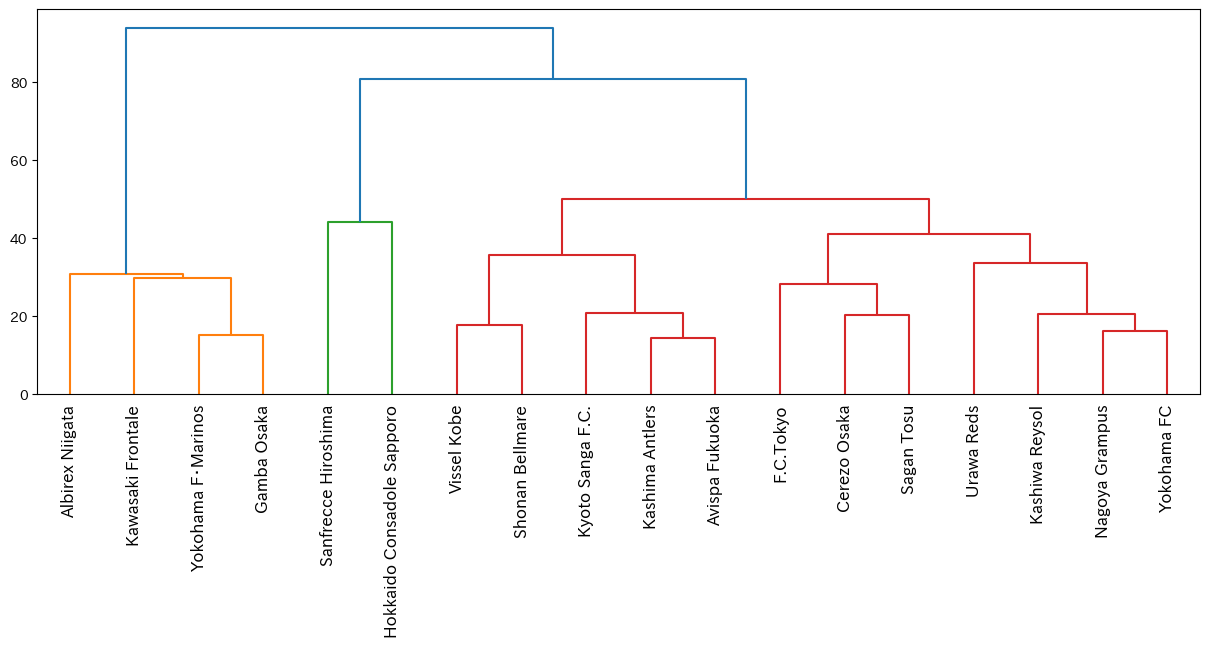

In [41]:
X = df_goalstyle.values[:,1:]
print(X)
result = linkage(X, method='ward')
plt.figure(figsize=(15,5))
dendrogram(result, labels = labels)
# ラベルを90度回転
plt.xticks(rotation=90)
plt.show()

In [43]:
# 上記の結果から4つにグループ分けを行う。
cluster = fcluster(result, t = 50, criterion = 'distance')
cluster


array([3, 1, 4, 2, 4, 3, 4, 3, 1, 1, 4, 4, 2, 3, 1, 4, 3, 4], dtype=int32)

C:\Users\haruc\AppData\Local\Temp\ipykernel_32920\2465947522.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=14)
C:\Users\haruc\AppData\Local\Temp\ipykernel_32920\2465947522.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=14)
C:\Users\haruc\AppData\Local\Temp\ipykernel_32920\2465947522.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=14)
C:\Users\haruc\AppData\Local\Temp\ipykernel_32920\2465947522.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

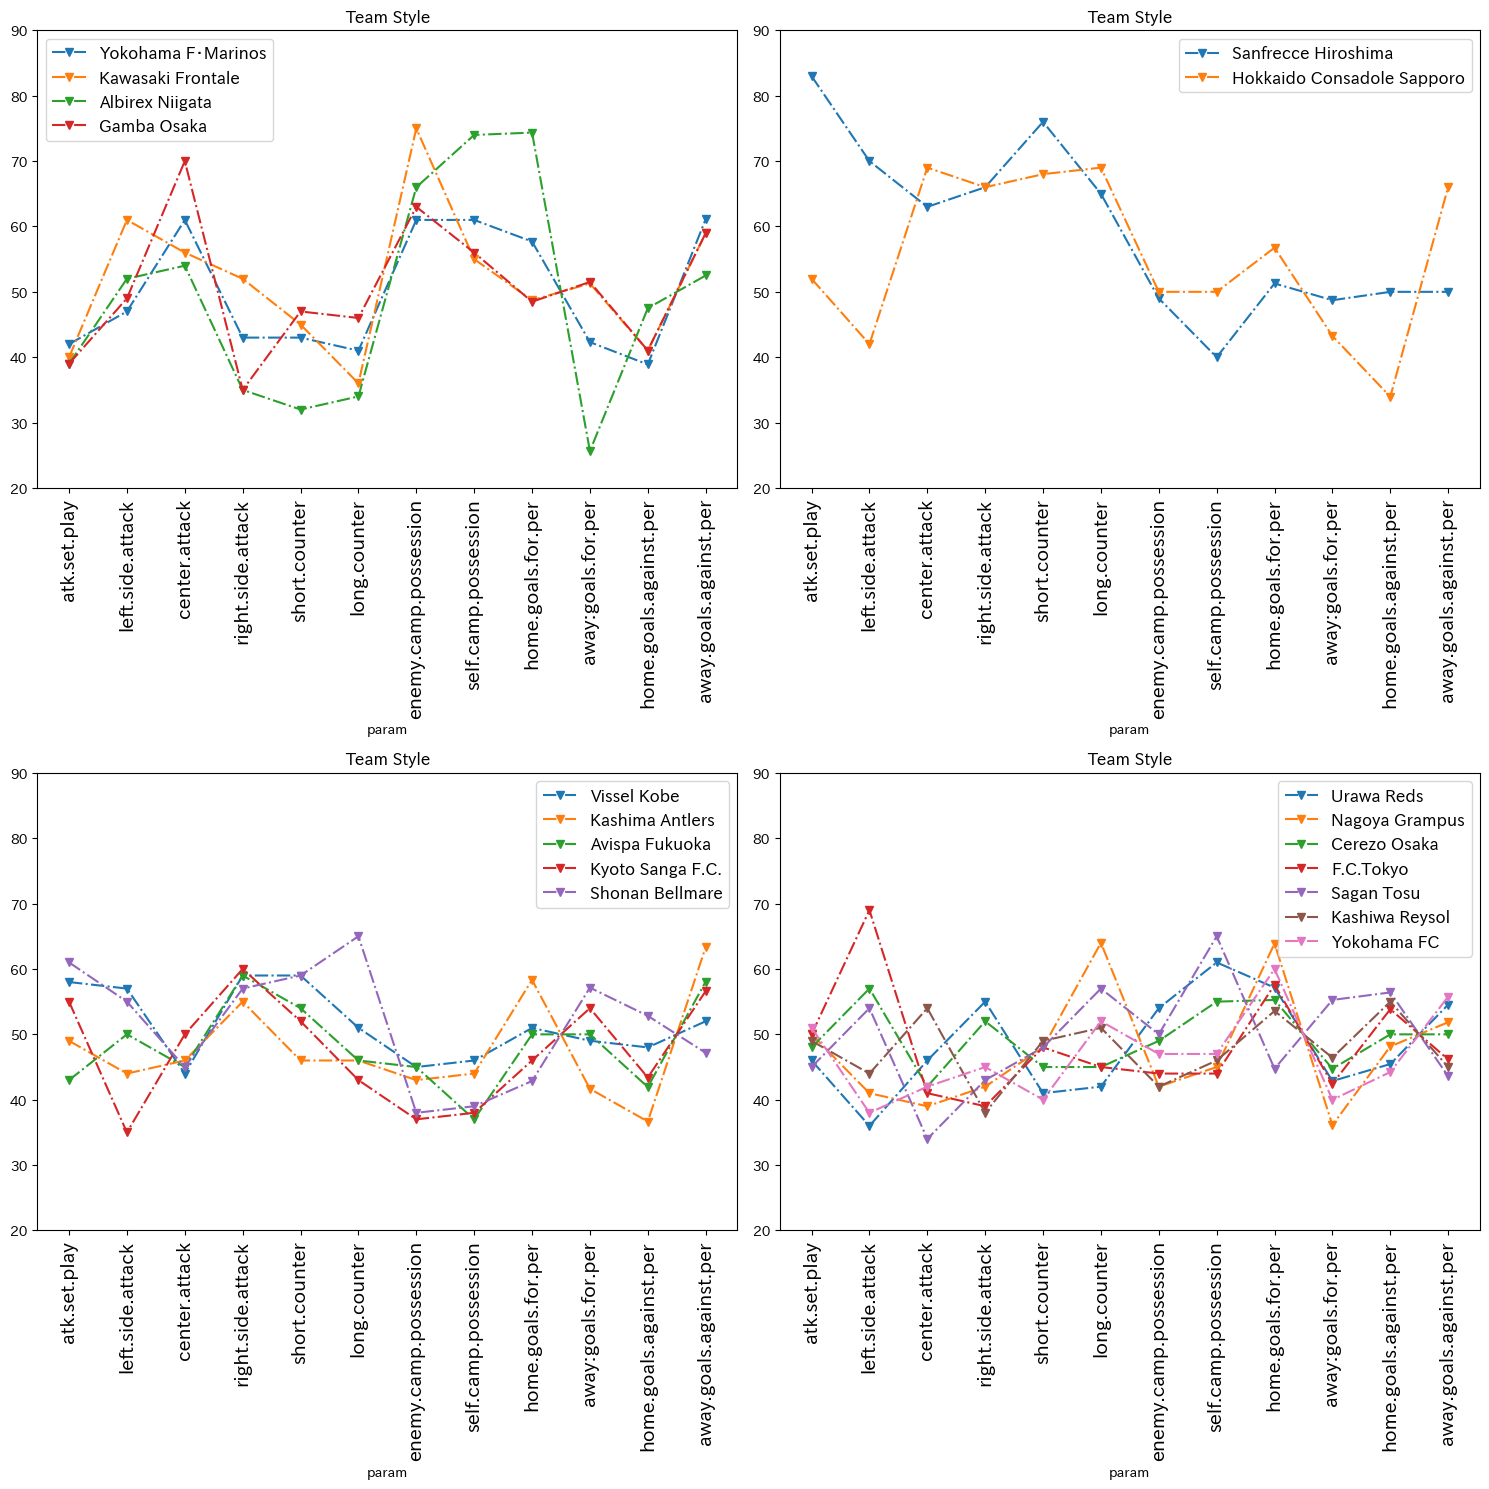

In [44]:
# 割り振られたクラスターを参考に、折れ線グラフを書き、分類が妥当かクラスターごとに可視化して確認する
df_goalstyle = df_goalstyle.assign(cluster = cluster)
df_goalstyle['cluster'] = df_goalstyle['cluster'].astype('str')

# 枠の指定
fig, ax = plt.subplots(2,2, figsize=(15,15),tight_layout=True)

for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '1'])):
    ax[0,0].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '1'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '1'].T.iloc[0,i], linestyle="-.")
for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '2'])):
    ax[0,1].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '2'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '2'].T.iloc[0,i], linestyle="-.")
for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '3'])):
    ax[1,0].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '3'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '3'].T.iloc[0,i], linestyle="-.")
for i in range(len(df_goalstyle.loc[df_goalstyle['cluster'] == '4'])):
    ax[1,1].plot(df_goalstyle.T.index[2:14], df_goalstyle.loc[df_goalstyle['cluster'] == '4'].T.iloc[1:13,i],
                 marker='v',label=df_goalstyle.loc[df_goalstyle['cluster'] == '4'].T.iloc[0,i], linestyle="-.")
# y軸の主要なロケータを設定
for i in range(2):
    for j in range(2):
        ax[i,j].set(title='Team Style', xlabel='param', yticks=[20,30,40,50,60,70,80,90])
        ax[i,j].set_xticklabels(df_goalstyle.columns[1:13], rotation=90, fontsize=14)  
# 各サブプロットに凡例を表示
for axis in ax.flat:
    axis.legend(fontsize=12)
plt.show()


##### cluster1
* 全クラスターの中で、セットプレーを起点に攻撃に転じる指数が最も低い群
* 自陣・敵陣とも、ボールを保持できている指数が最も高い
* アウェイゲームで失点する割合が高いチーム
#### cluster2
* アウェイゲームで得点する比率のほうが高い
* 右サイトからの攻撃が比較的高い傾向にある
#### cluster3
* 全体的に50~60をとる安定した群
#### cluster4
* 左サイドからの攻撃指数が高い
* ホームでの得点割合が最も高い
#### cluster5
* セットプレー、ショートカウンターの攻撃指数が最も高い
* ほかの群と比べ、比較的ホームでの得点割合が高い傾向にある

In [23]:
# 既存のcsvファイルにクラスター情報を付加
df_goalstyle.to_csv('../../api_data/statistics/team/team_style_2023.csv',index=False)